In [13]:
import litho1pt0 as litho
from pprint import pprint
import numpy as np

In [14]:
## How to initialise with a different model

# litho1.preprocess_raw_litho1_data("/usr/local/src/LITHO1.0/litho_model","/tmp/truncated")

In [15]:
# litho_data, litho_points = litho1.process_raw_litho1_data("/tmp/truncated")

In [16]:
# litho1.write_processed_litho_data("litho_data.npz", litho_data, litho_points)

# data = np.load("litho_data.npz")
# data.keys()

In [17]:
print(" Layer keys \n")
pprint( litho.l1_layer_decode.items() )
print("\n Value keys \n")
pprint( litho.l1_data_decode.items() )

 Layer keys 

[('ASTHENO-TOP', 0),
 ('LID-BOTTOM', 1),
 ('LID-TOP', 2),
 ('CRUST3-BOTTOM', 3),
 ('CRUST3-TOP', 4),
 ('CRUST2-BOTTOM', 5),
 ('CRUST2-TOP', 6),
 ('CRUST1-BOTTOM', 7),
 ('CRUST1-TOP', 8),
 ('SEDS3-BOTTOM', 9),
 ('SEDS3-TOP', 10),
 ('SEDS2-BOTTOM', 11),
 ('SEDS2-TOP', 12),
 ('SEDS1-BOTTOM', 13),
 ('SEDS1-TOP', 14),
 ('WATER-BOTTOM', 15),
 ('WATER-TOP', 16),
 ('ICE-BOTTOM', 17),
 ('ICE-TOP', 18)]

 Value keys 

[('DEPTH', 0),
 ('DENSITY', 1),
 ('VP', 2),
 ('VS', 3),
 ('QKAPPA', 4),
 ('QMU', 5),
 ('VP2', 6),
 ('VS2', 7),
 ('ETA', 8)]


In [18]:
lats = np.array([0,10,20])
lons = np.array([0,0,0])

litho.layer_depth(lats,lons, layerID='ASTHENO-TOP')

array([  60245.        ,  273883.83336101,  122772.4301943 ])

In [19]:
## make a global raster of some quantity

lonv, latv = np.meshgrid(np.linspace(-180,180,720), np.linspace(-89,89,356), sparse=False, indexing='xy')

l1 = litho.layer_depth(latv, lonv, "LID-BOTTOM")
l2 = litho.layer_depth(latv, lonv, "LID-TOP")

lthickness = (l1 - l2)*0.001
lab_depth = l1*0.001


l1 = litho.layer_depth(latv, lonv, "CRUST3-BOTTOM")
l2 = litho.layer_depth(latv, lonv, "CRUST1-TOP")

cthickness = (l1 - l2)*0.001


l1 = litho.layer_depth(latv, lonv, "LID-BOTTOM")
l2 = litho.layer_depth(latv, lonv, "CRUST1-TOP")

llthickness = (l1 - l2)*0.001

topo = litho.layer_depth(latv, lonv, "WATER-BOTTOM")


In [20]:
topo

array([[ -135.23887809,  -138.06660656,  -140.84866069, ...,
         -135.65794608,  -135.47114781,  -135.23887809],
       [ -433.72593124,  -437.97065952,  -442.14683053, ...,
         -434.35423218,  -434.07420627,  -433.72593124],
       [ -726.62400715,  -746.84264628,  -767.01033153, ...,
         -709.10817497,  -717.89041198,  -726.62400715],
       ..., 
       [ 3432.81748539,  3428.84727105,  3424.74600028, ...,
         3440.36354698,  3436.65634136,  3432.81748539],
       [ 3159.71432869,  3149.95796228,  3140.28021567, ...,
         3179.45993881,  3169.54857085,  3159.71432869],
       [ 3500.41420693,  3493.91591176,  3487.46998997, ...,
         3513.56593025,  3506.96437968,  3500.41420693]])

In [21]:
%matplotlib inline

import cartopy
# import gdal
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

global_extent     = [-180.0, 180.0, -89, 89]

projection1 = ccrs.Orthographic(central_longitude=140.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide()
projection3 = ccrs.Robinson()


base_projection = ccrs.PlateCarree()

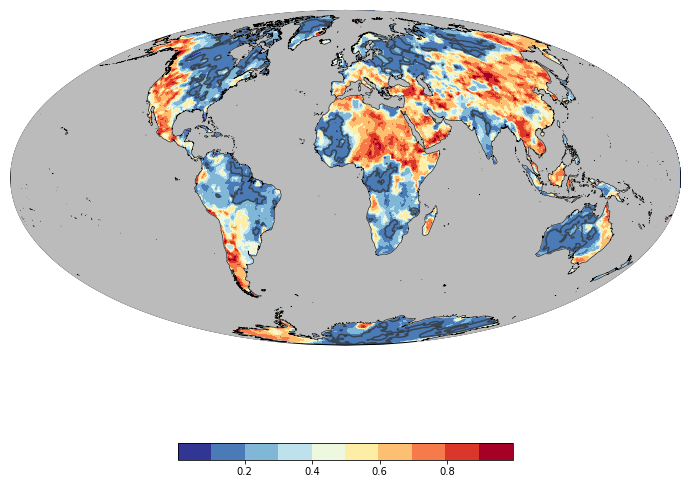

In [ ]:
## Relative thickness of crust

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=projection2)
ax.set_global()

colormap = plt.cm.get_cmap('RdYlBu_r', 10)

m = ax.imshow(cthickness/(cthickness+lthickness), origin='lower', transform=base_projection,
          extent=global_extent, zorder=0, cmap=colormap, interpolation="gaussian")

plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)

ax.contour(lab_depth, origin='lower', levels=[250], 
                 extent=global_extent, transform=base_projection, colors="#333333", alpha=0.75)



ax.add_feature(cartopy.feature.OCEAN, alpha=1.0, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=0.5)


# fig.savefig("RelativeCrustalThickness.png", dpi=600)

In [ ]:
## 2nd Plot 

fig = plt.figure(figsize=(12, 12), facecolor="none")

ax  = plt.subplot(111, projection=projection2)
ax.set_global()

colormap = plt.cm.get_cmap('RdYlBu', 10 )

m2 = ax.imshow(cthickness, origin='lower', transform=base_projection,
          extent=global_extent, zorder=0, cmap=colormap, vmin=15, vmax=70,
          interpolation="gaussian")

# m = ax.contourf(cthickness, origin='lower', levels=, 
#                 cmap=colormap, 
#                 extent=global_extent, transform=base_projection, 
#                 extend="max")


cb = plt.colorbar(mappable=m2, orientation="horizontal", shrink=0.5)

# m = ax.contourf(lab_depth, origin='lower', levels=[250, 400], 
#                 colors=["#FFFFFF"], 
#                 extent=global_extent, transform=base_projection, extend="max",
#                 alpha=0.25)


m = ax.contour(lab_depth, origin='lower', levels=[250, ], 
                colors=["#FFFFFF"], 
                extent=global_extent, transform=base_projection, extend="max",
                alpha=1.)


ax.add_feature(cartopy.feature.OCEAN, alpha=1.0, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=0.5)


# plt.savefig("CrustalThickness.png", dpi=600 )

In [ ]:
## Contours of LAB 

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=projection2)
ax.set_global()

m = ax.contourf(lab_depth, origin='lower', levels=[0, 130, 250, 400], 
                colors=[ "#FFFFFF", "#DDDDFF", "#9999FF"], 
                extent=global_extent, transform=base_projection, # extend="max",
                linewidth=0.25)


# ax.contour(lab_depth, origin='lower', levels=[130, 250], 
#                  extent=global_extent, transform=base_projection, colors="#555555")

plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)


ax.add_feature(cartopy.feature.OCEAN, alpha=1.0, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=0.5)



plt.savefig("LithosphereThickness.png", dpi=600)